# Метод роения частиц

In [17]:
import numpy as np 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

*Метод роения частиц* (*particle swarm optimization*, PSO) является одним из алгоритмов коллективной оптимизации и основывается на имитации социального поведения колониальных живых существ — к примеру, колонии муравьев или стаи птиц, — выполняющих коллективный поиск места с наилучшими условиями для существования.

Неформально данный алгоритм можно иллюстрировать следующем образом: при поиске пищи каждая особь передвигается по окружающей среде независимо от остальных членов колонии с некой долей случайности в своих движениях. Рано или поздно одна из особей находит пропитание и, будучи существом социальным, сообщает об этом остальным, что стягивает других к найденной пище.

## Алгоритм

Найдем глобальный экстремум функции $F \colon \mathbb{R}^{n} \to \mathbb{R}$. Для определенности будем искать глобальный минимум:

$$
	\mathop{\mathrm{argmin}}_{x_i \in \mathbb{R}^{n}} F(x_i).
$$

Пусть в нашем рое $x$ существует $\ell$ частиц размерности $\mathbb{R}^{n}$, тогда рой имеет вид $x = \{x_i\}_{i = 1}^{\ell}$, где частица $x_i = (x_1, ..., x_n) \in D$, $D = \{(x_1, ..., x_n) \in \mathbb{R}^n \ \colon \  a < x_i < b \}$, $a,\ b \in \mathbb{R}$.

Пусть также определен вектор скорости $v = \{v_i\}_{i=1}^{\ell}$, $i$-я компонента которого является скоростью $i$-й частицы, $v_i = (v_1, ..., v_n) \in D$.

* Изначально случайным образом выбираем расположение роя $x_0$ и скорость движения каждой частицы $v_0$.

* Определяем новое расположение роя:

$$
		x_{t + 1} = x_t + v_t.
$$

* Выбираем наилучшую точку для $i$-й частицы:

$$
p_{i, t}
=
\begin{cases}
    x_{i, t},
    &
    F(x_{i, t + 1}) \geq F(x_{i, t})
    \\
    x_{i, t + 1},
    &
    F(x_{i, t + 1}) < F(x_{i, t})
\end{cases}, \ i = 1, ..., \ell.
$$

Тогда вектор наилучших позиций для каждой частицы имеет вид:

$$
p_{t} = \{p_{i, t}\}_{i = 1}^{\ell}.
$$

* Выбираем наилучшую точку для всего сообщества:

$$
g_{t}
=
\mathop{\mathrm{argmin}}_{i \in (1, ..., \ell)} \limits F(p_{i, t}).
$$

* Обновляем скорость для $i$-й частицы посредством следующей формулы:

$$
v_{i, t + 1}
=
w
v_{i, t}
+
c_1
\xi_{1, t}
[p_{i, t} - x_{i, t}]
+
c_2
\xi_{2, t}
[g_{t} - x_{i, t}], \
i = 1, ..., \ell,
$$

где $w \in \mathbb{R}$ — инерционный вес, $c_1,\ c_2 \in \mathbb{R}$ — коэффициенты ускорения, $\xi_{1, t},\ \xi_{2, t} \sim U(0, 1)$.

Тогда векотр скорости имеет вид:

$$
v_{t+1} = \{v_{i, t + 1}\}_{i = 1}^{\ell}.
$$


Три фактора влияют на частицу в положении $x_{i, t}$. С одной стороны, когнитивное воздействие побуждает частицу двигаться к ее лучшей позиции $p_{i, t}$, с другой стороны — социальное воздействие побуждает частицу продвигаться в сторону лучшей позиции роя $g_{t}$. Кроме того, собственная скорость $v_{i, t}$ обеспечивает движение по инерции, что позволяет частице преодолевать локальные экстремумы и исследовать неизвестные области заданного пространства. Таким образом, происходит переход от точки $x_{i, t}$ в точку $x_{i, t+1}$.

PSO использует последовательности равномерно распределенных случайных величин $\xi_{1, t},\ \xi_{2, t}$ и коэффициенты ускорения $c_1,\ c_2$, опеределяющие максимальный размер шага, который частица может сделать за одну итерацию. При $c_1 = 0$ метод роения частиц будет опираться только на наилучшую позицию сообщества — в таком случае алгоритм будет быстро сходиться, однако маловероятен факт нахождения глобального оптимума. При $c_1 > 0$ метод использует связь всего сообщества — скорость конвергенции падает, но глобальный оптимум оказывается более вероятным.

* Возвращаемся к пункту 2, пока не выполнен критерий останова.
    
    * Ограничить максимально возможное количество перемещений роя.
	* Задать минимальную точность приближения.
	* Определить минимальное уменьшение функции.


## Функция Розенброка

Функция Розенброка — это невыпуклая функция вида

$$
f(x_1, ..., x_n)
=
\sum^{n-1}_{i=1}\limits
(a - x_i)^2 + b \left( x_{i+1} - x^2 \right)^2,
$$

использующаяся в качестве оценки производительности оптимизационных алоритмов. Для наших целей будем использовать трехмерный случай:

$$
f(x, y) = (a - x)^2 + b(y-x^2)^2,
$$

где глобальный минимум достигается в точке $(a, a^2)$, где $f(a, a^2) = 0$.

Обычно $a = 1$, $b=100$. Тогда функция Розенброка примет следующий вид:

$$
f(x, y) = (1 - x)^2 + 100(y-x^2)^2.
$$

Глобальный минимум данной функции находится внутри так называемой "долины": в нашем случае — в точке $(1, 1)$. Приблизиться к долине легко, однако к глобальному минимуму — довольно сложно.

Только при $a = 0$, функция является симметричной, а ее минимум находится в начале координат.

In [18]:
def rosenbrock_func(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

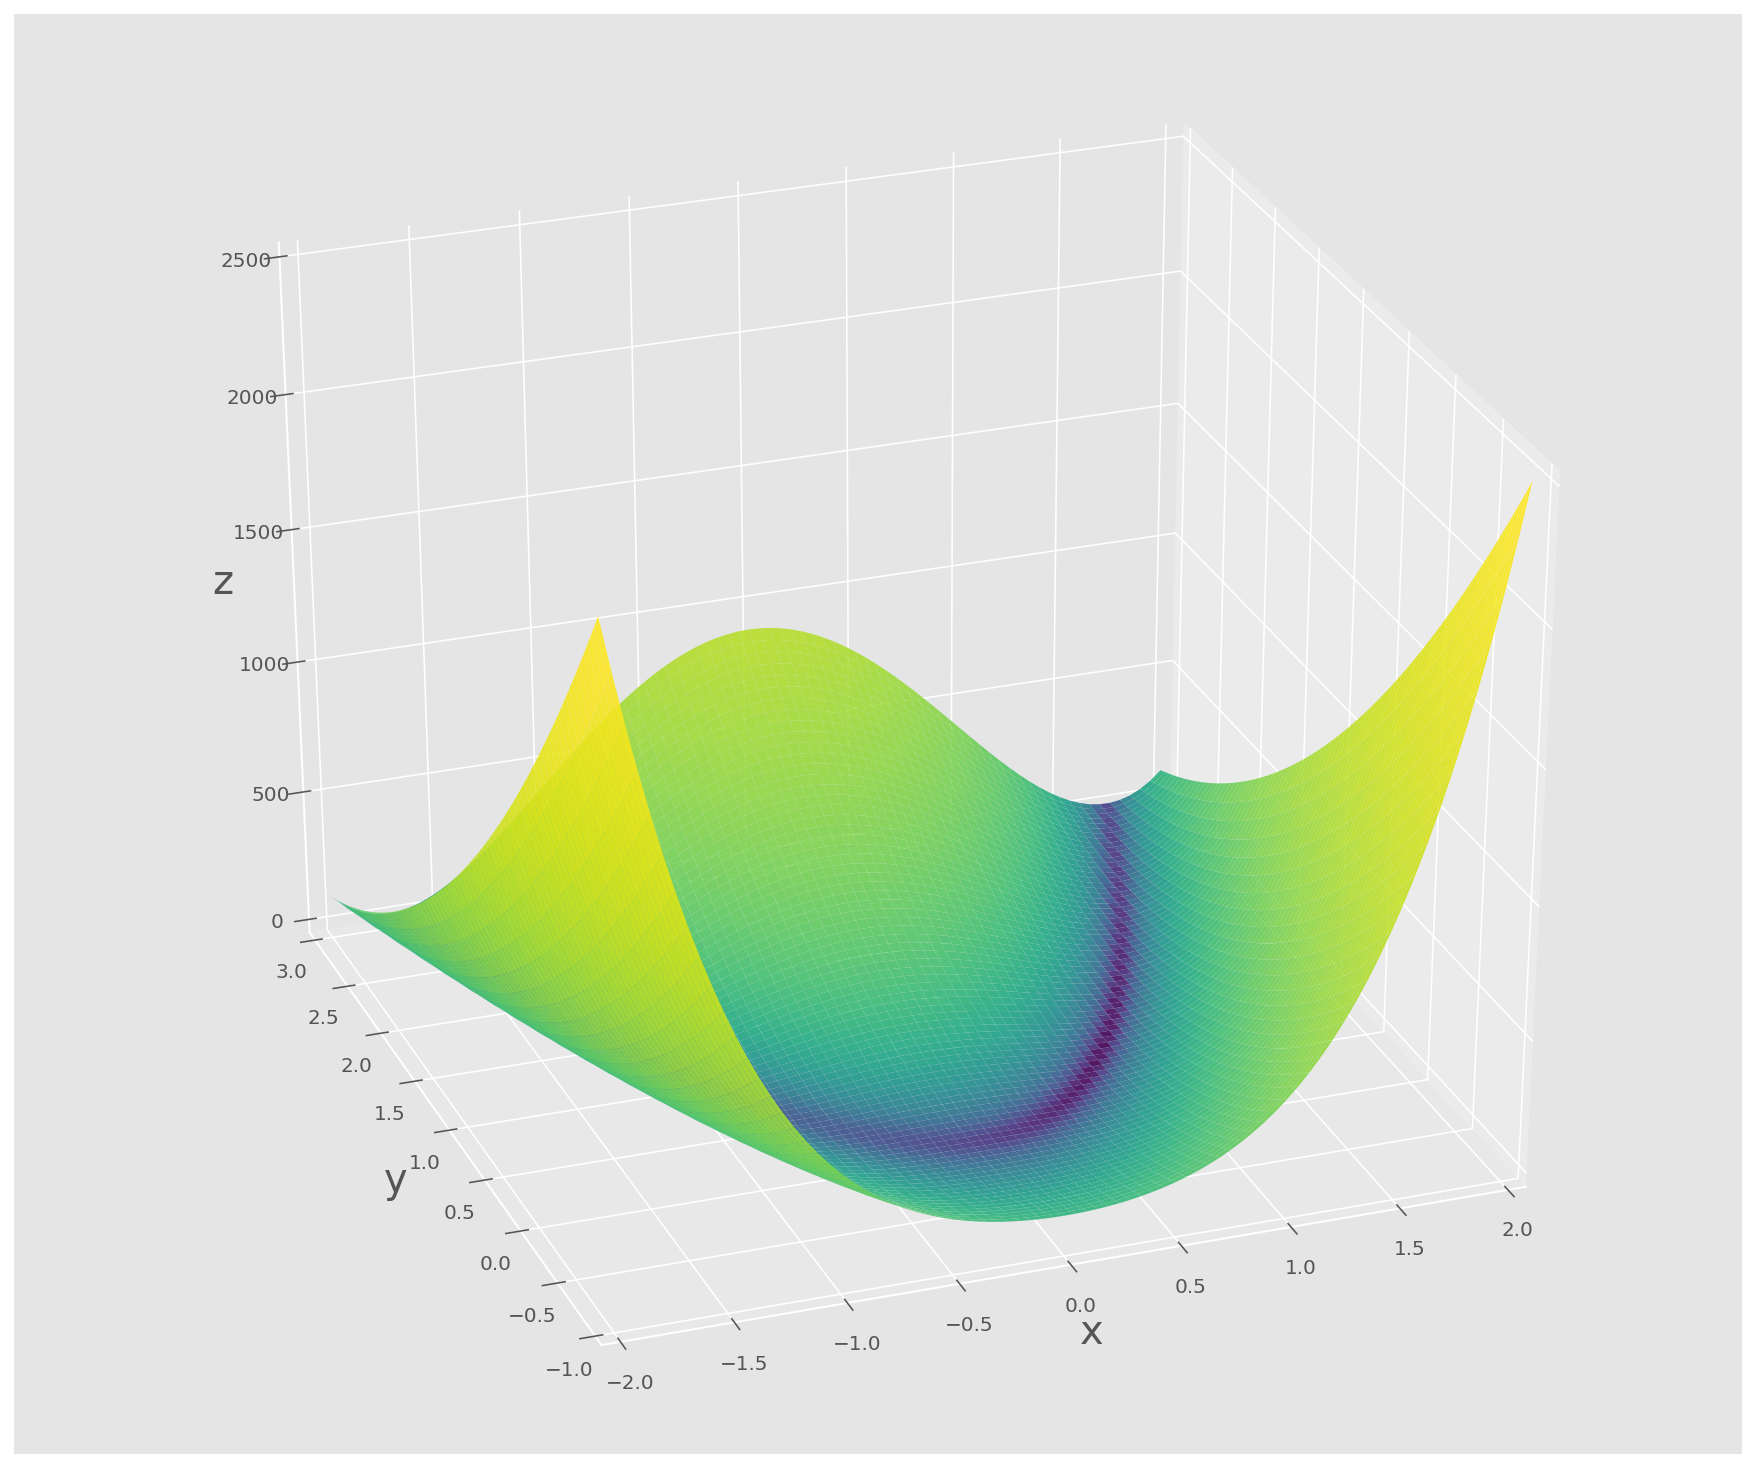

In [19]:
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig, azim=-128, elev=43)

s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock_func(X, Y)
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, norm = LogNorm(),
#                 cmap="viridis")
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a
# graph with wide black edges, which will make the surface look much darker
# than the one illustrated in the figure above.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, norm=LogNorm(),
                linewidth=0, edgecolor='none', cmap="viridis",
                antialiased=True, alpha=0.9)

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       
ax.set_zlim([0, 2500]) 

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 250)

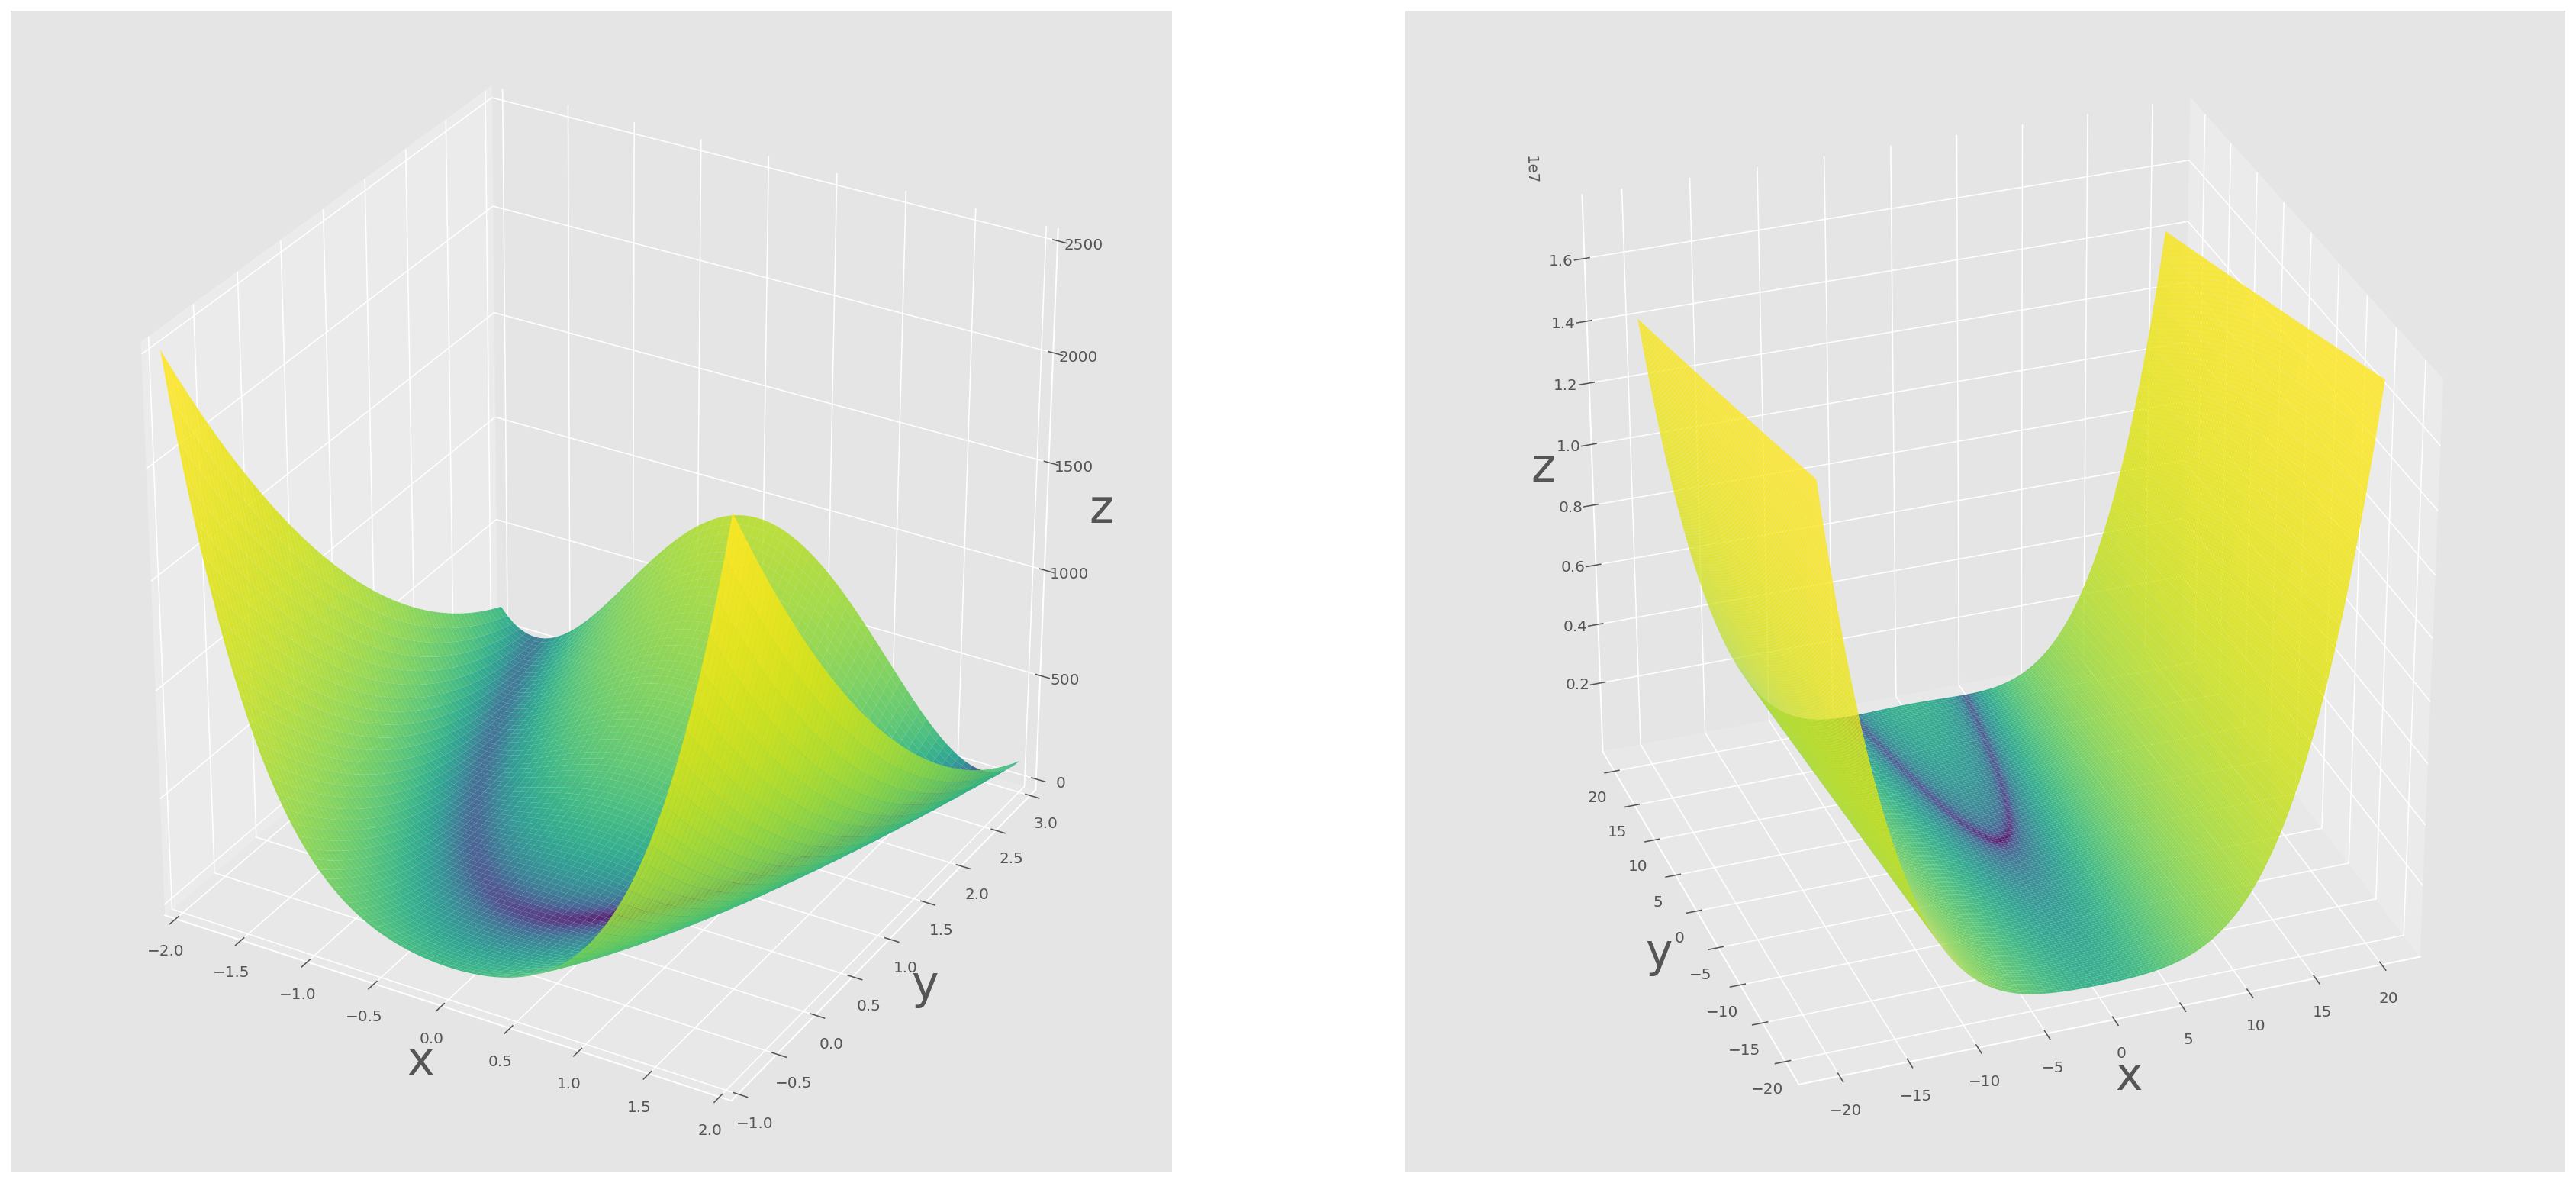

In [8]:
fig = plt.figure(figsize=(30, 14))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax_0 = fig.add_subplot(1, 2, 1, projection='3d')
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock_func(X, Y)
ax_0.plot_surface(X, Y, Z, rstride=1, cstride=1, norm=LogNorm(),
                linewidth=0, edgecolor='none', cmap="viridis",
                antialiased=True, alpha=0.9)
#ax_0.contour3D(X, Y, Z, 100, cmap='binary_r')
#ax_0.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax_0.set_xlabel('x', fontsize=30)
ax_0.set_ylabel('y', fontsize=30)
ax_0.set_zlabel('z', fontsize=30)
ax_0.set_xlim([-2, 2.0])                                                       
ax_0.set_ylim([-1, 3.0])                                                       
ax_0.set_zlim([0, 2500]) 

ax.view_init(30, 250)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax_1 = fig.add_subplot(1, 2, 2, projection='3d')

x = np.linspace(-20, 20, 150)
y = np.linspace(-20, 20, 150)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)
ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1, norm=LogNorm(),
                linewidth=0, edgecolor='none', cmap="viridis",
                antialiased=True, alpha=0.9)
#ax_1.contour3D(X, Y, Z, 1000, cmap='binary_r')
#ax_1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax_1.set_xlabel('x', fontsize=30)
ax_1.set_ylabel('y', fontsize=30)
ax_1.set_zlabel('z', fontsize=30)

ax_1.view_init(30, 250)

Определим функцию Розенброка:

In [20]:
def func(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

Инициализируем метод роя частиц

In [21]:
class Particle:    
    def __init__(self, arg, search_space):
        self.pos = np.asarray([])      # расположение частицы
        self.velocity = np.asarray([]) # вектор скорости частицы
        self.pos_best = None           # лучшее расположение 
        
        for i in range(arg):
            pos_i = np.random.uniform(search_space[i][0], search_space[i][1])
            self.pos = np.append(self.pos, pos_i)
            vel_i = np.random.uniform(0.2 * search_space[i][0] , 0.2 * search_space[i][1])
            self.velocity = np.append(self.velocity, vel_i)
        
        # pos_best --- это список, состоящий из лучшего расположения частицы 
        # и значения функции в данной точке
        self.pos_best = [self.pos.copy(), func(self.pos)] 
    
    def update_position(self):
        self.pos += self.velocity
    
    def update_velocity(self, w, c1, c2, swarm_best):
        inertion = w * self.velocity
        cognitive_acceler = c1 * np.random.uniform() * (self.pos_best[0] - self.pos)
        social_acceler = c2 * np.random.uniform() * (swarm_best - self.pos)
        self.velocity = inertion + cognitive_acceler + social_acceler
    
    def choose_personal_best(self):
         if func(self.pos) < func(self.pos_best[0]):
                    self.pos_best[0] = self.pos.copy()
                    self.pos_best[1] = func(self.pos)

In [22]:
class ParticleSwarmOptimisation:
    def __init__(self, ell=40, w=1.0, c1=0.2, c2=0.2, max_iter=1000, tol=1e-24):
        """
        PARAMETERS:
        ell — количество частиц в рое.
        w — инерционный вес.
        c1 — коэффициент ускорения когнитивного воздействия на частицу.
        c2 — коэффициент ускорения социального воздействия на частицу.
        max_iter — максимальное количество итераций.
        tol — точность.
        """
        self.ell = ell
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iter = max_iter
        self.tol = tol
        
        self.swarm_best = None # лучшее расположение для всего роя
        self.swarm = None      # расположение всех частиц (рой)
        
    def search_global(self, arg, search_space):
        """
        PARAMETERS:
        arg — количество аргументов функции.
        search_space — область поиска оптимума. Задается как список из кортежей, где 
        кортеж — это область значений одного аргумента функции.
        """
        self.arg = arg
        self.search_space = np.array(search_space)
        self.swarm = np.asarray([])
        
        # генерируем расположение роя 
        for _ in range(self.ell):
            self.swarm = np.append(self.swarm, 
                                   Particle(self.arg, self.search_space))
    
        for k in range(self.max_iter):
            for i in range(self.ell):
                # обновляем расположение частицы
                self.swarm[i].update_position()
                # сравниваем с лучшей точкой частицы
                self.swarm[i].choose_personal_best()
            
            # выбираем лучшую точку для роя
            if k != 0:
                dist_0 = self.dist(self.swarm_best[0])
                self.choose_social_best()
                dist_1 = self.dist(self.swarm_best[0])
                
                # останавливаем поиск в условиях заданной точности
                if (dist_0 != dist_1) and (abs(dist_0 - dist_1) <= self.tol):
                    break
            else:
                self.choose_social_best()
                
            # обновляем вектор скорости
            for i in range(self.ell):
                self.swarm[i].update_velocity(self.w, self.c1, self.c2, self.swarm_best[0])
        
        print(f"Глобальный оптимум: {self.swarm_best[0]}.")
        print(f"Значение функции в данной точке: {self.swarm_best[1]}.")
        
        
    def choose_social_best(self):
        self.swarm_best = min([[self.swarm[i].pos_best[0], 
                                self.swarm[i].pos_best[1]] for i in range(self.ell)],
                                key=lambda x: x[1])
        
    def dist(self, x):
        return np.sqrt(np.sum(x ** 2))

In [23]:
np.random.seed(53)

a = ParticleSwarmOptimisation(w=0.95, ell=100)
a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 6.366439023928984e-22.


In [24]:
class ParticleSwarmOptimisation:
    def __init__(self, ell=40, w=1.0, c1=0.2, c2=0.2, max_iter=1000, tol=1e-6):
        """
        PARAMETERS:
        ell — количество частиц в рое.
        w — инерционный вес.
        c1 — коэффициент ускорения когнитивного воздействия на частицу.
        c2 — коэффициент ускорения социального воздействия на частицу.
        max_iter — максимальное количество итераций.
        tol — точность.
        """
        self.ell = ell
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iter = max_iter
        self.tol = tol
        
        self.swarm_best = None # лучшее расположение для всего роя
        self.swarm = None      # расположение всех частиц (рой)
        self.func_history = None # для графика
        self.x_0 = None
        self.x_50 = None
        self.x_100 = None
        self.x_150 = None
        self.x_300 = None
        self.x_999 = None
        self.v_0 = None
        self.v_50 = None
        self.v_100 = None
        self.v_150 = None
        self.v_300 = None
        self.v_999 = None
        
    def search_global(self, arg, search_space):
        """
        PARAMETERS:
        arg --- количество аргументов функции.
        search_space --- область поиска оптимума. Задается как список из кортежей, где 
        кортеж --- это область значений одного аргумента функции.
        """
        self.arg = arg
        self.search_space = np.array(search_space)
        self.swarm = np.asarray([])
        self.func_history = []
        self.x_0 = []
        
        
        # генерируем расположение роя 
        for _ in range(self.ell):
            self.swarm = np.append(self.swarm, 
                                   Particle(self.arg, self.search_space))
        # для графика 
        self.x_0 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
        self.v_0 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
        
        for k in range(self.max_iter):
            for i in range(self.ell):
                # обновляем расположение частицы
                self.swarm[i].update_position()
                # сравниваем с лучшей точкой частицы
                self.swarm[i].choose_personal_best()
            
            # выбираем лучшую точку для роя
            if k != 0:
                dist_0 = self.dist(self.swarm_best[0])
                self.choose_social_best()
                dist_1 = self.dist(self.swarm_best[0])
                
                # для графика
                self.func_history.append(func(self.swarm_best[0]))
                
                # останавливаем поиск в условиях заданной точности
                if (dist_0 != dist_1) and (abs(dist_0 - dist_1) <= self.tol):
                    break
            else:
                self.choose_social_best()
                # для графика
                self.func_history.append(func(self.swarm_best[0]))
            
            # для графика
            if k == 50:
                self.x_50 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_50 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика
            if k == 100:
                self.x_100 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_100 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика
            if k == 150:
                self.x_150 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_150 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика 
            if k == 300:
                self.x_300 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_300 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # обновляем вектор скорости
            for i in range(self.ell):
                self.swarm[i].update_velocity(self.w, self.c1, self.c2, self.swarm_best[0])
        
        # для графика 
        self.x_999 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
        self.v_999 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
        
        print(f"Глобальный оптимум: {self.swarm_best[0]}.")
        print(f"Значение функции в данной точке: {self.swarm_best[1]}.")
        
        
    def choose_social_best(self):
        self.swarm_best = min([[self.swarm[i].pos_best[0], 
                                self.swarm[i].pos_best[1]] for i in range(self.ell)],
                                key=lambda x: x[1])
        
    def dist(self, x):
        return np.sqrt(np.sum(x ** 2))

In [25]:
np.random.seed(53)

a = ParticleSwarmOptimisation(w=0.95, ell=100, tol=1e-20)
a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 6.366439023928984e-22.


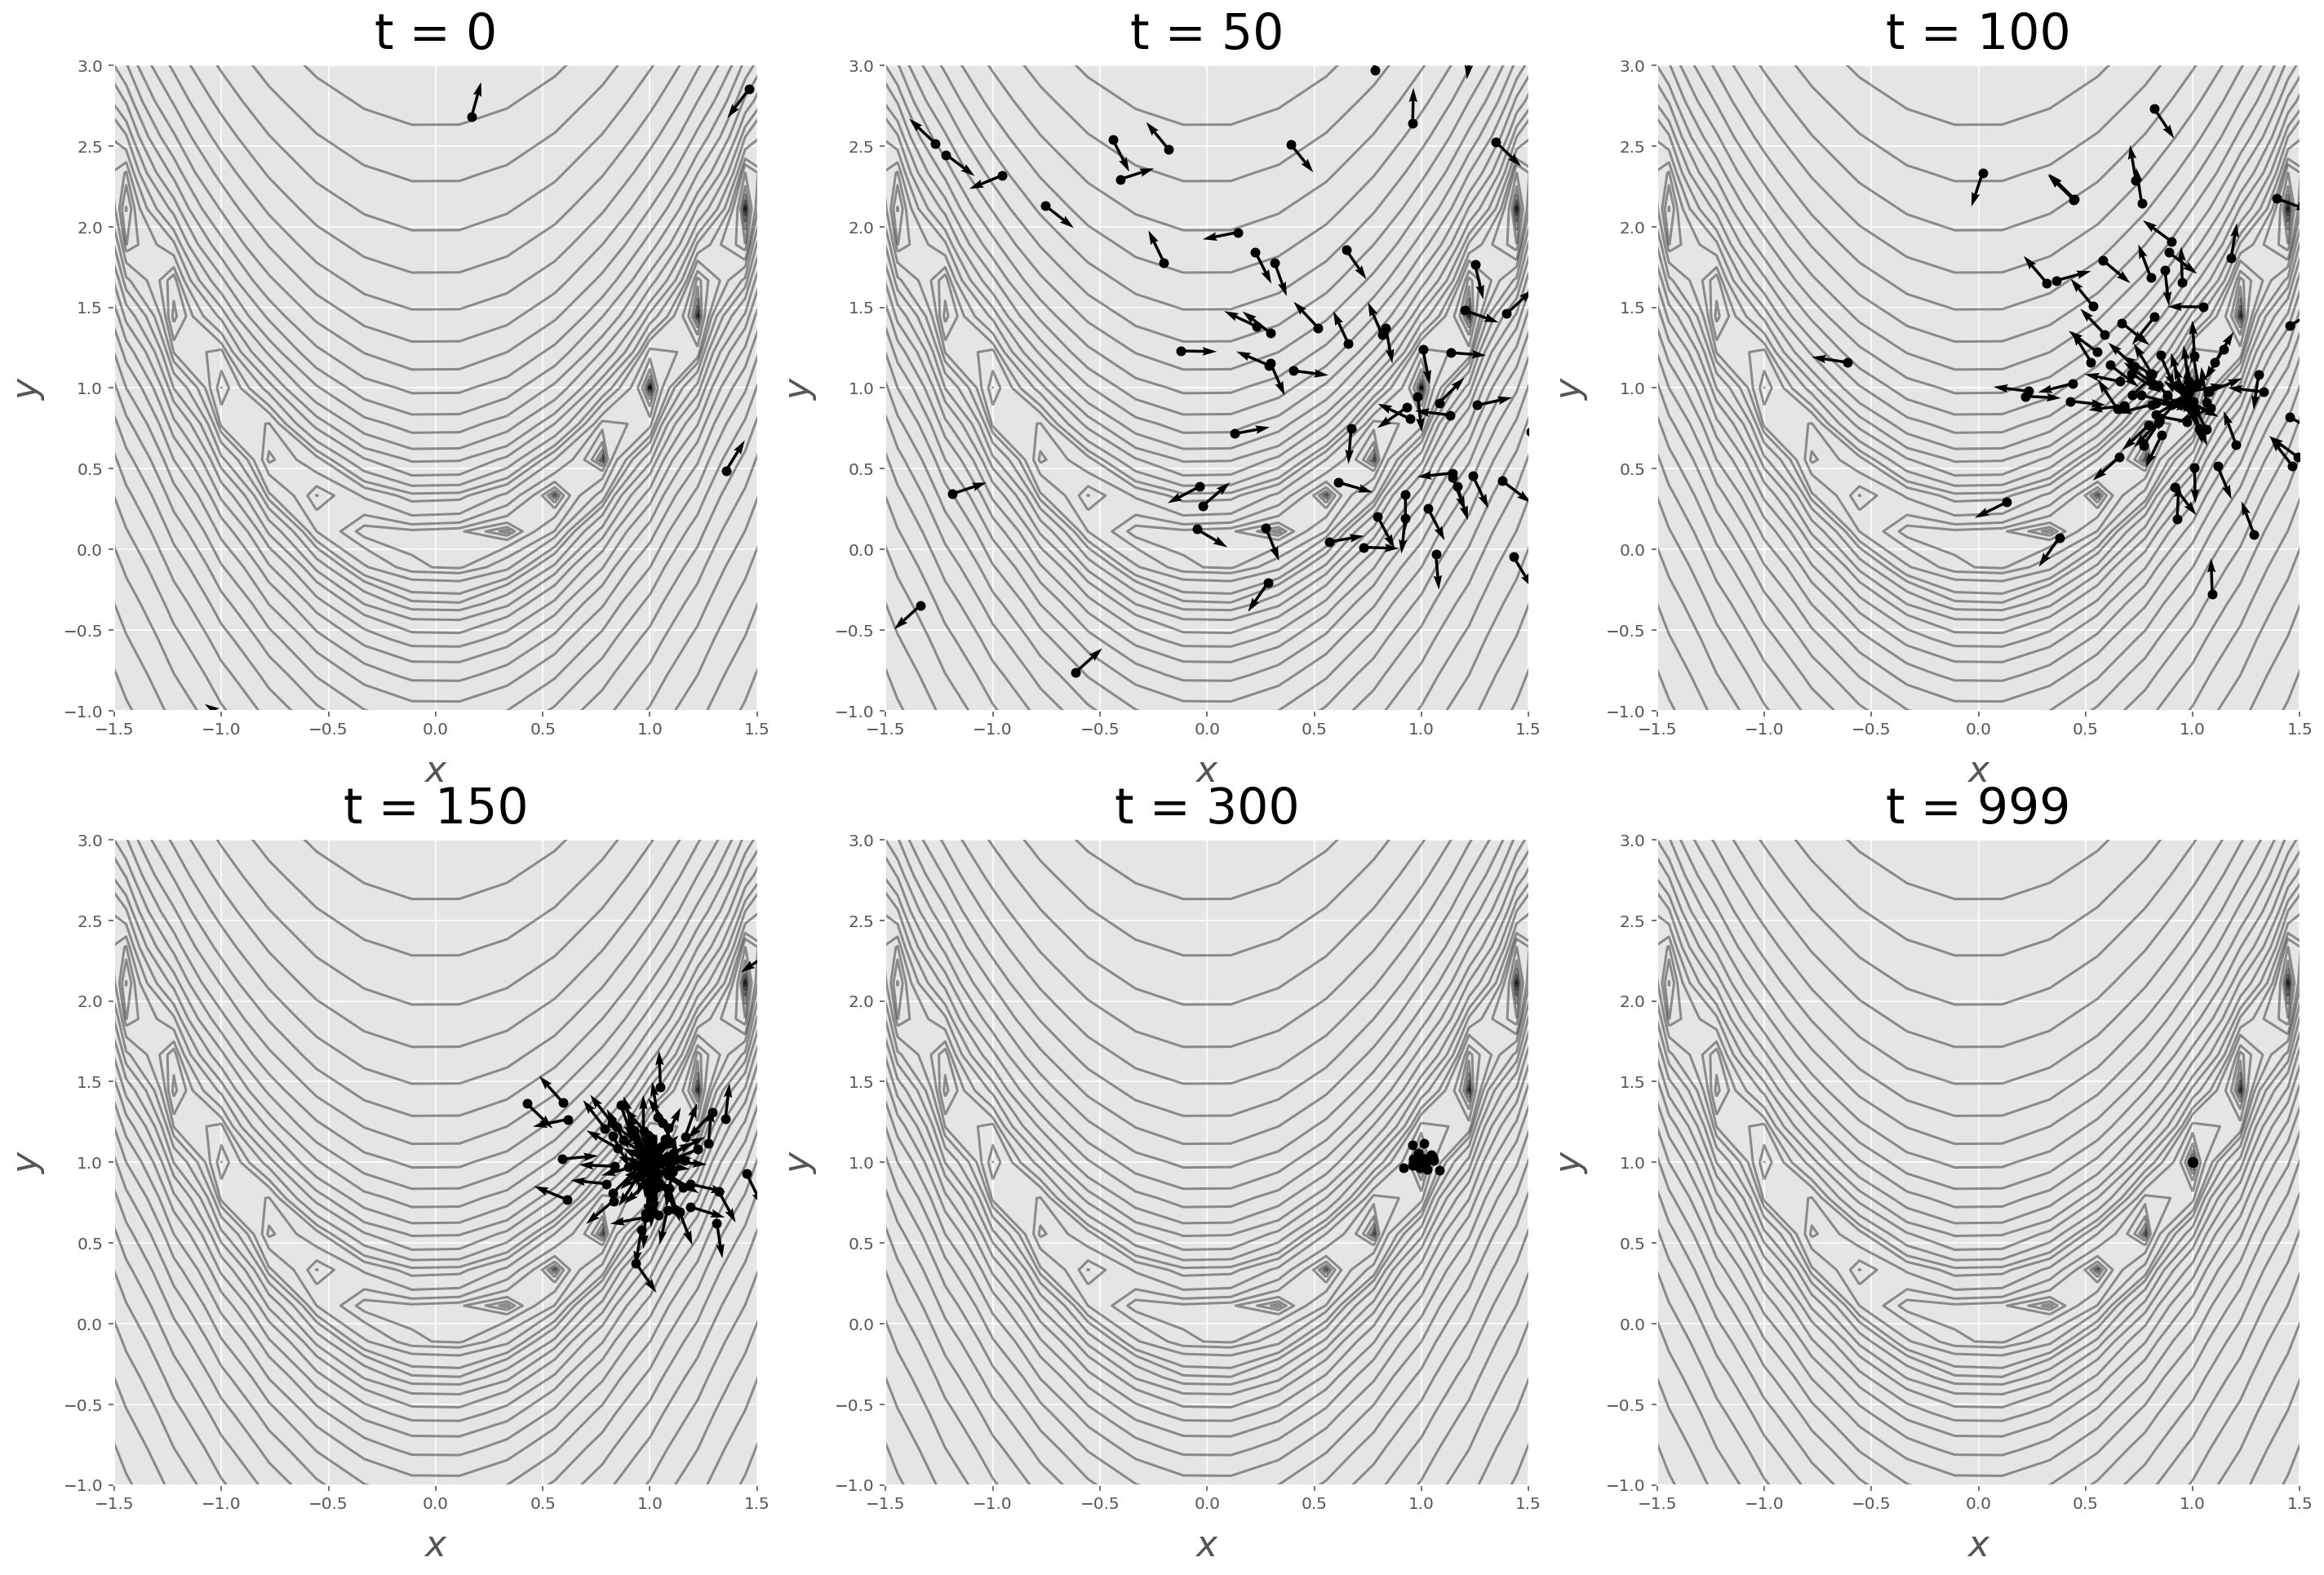

In [26]:
fig = plt.figure(figsize=(24, 16))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
fig_ax_1 = fig.add_subplot(spec[0, 0])
fig_ax_2 = fig.add_subplot(spec[0, 1])
fig_ax_3 = fig.add_subplot(spec[0, 2])
fig_ax_4 = fig.add_subplot(spec[1, 0])
fig_ax_5 = fig.add_subplot(spec[1, 1])
fig_ax_6 = fig.add_subplot(spec[1, 2])

axs = [fig_ax_1, fig_ax_2, fig_ax_3, 
       fig_ax_4, fig_ax_5, fig_ax_6]


t = [0, 50, 100, 150, 300, 999]
swarm = [a.x_0, a.x_50, a.x_100, a.x_150, a.x_300, a.x_999]
velocity = [a.v_0, a.v_50, a.v_100, a.v_150, a.v_300, a.v_999]
z = 0

x = np.linspace(-11, 11, 100)
y = np.linspace(-11, 11, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

lvls = np.concatenate((np.logspace(-4.7,1,30), np.logspace(1.1,4.7,30) ))

for ax in axs:
    ax.set_title("t = {}".format(t[z]), fontsize=30, pad=10)
    ax.set_xlabel('$x$', fontsize=22, labelpad=10)
    ax.set_ylabel('$y$', fontsize=22, labelpad=10)
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1, 3)
        
    ax.contour(X, Y, Z, alpha=0.4, levels=lvls, colors='black')
    
    xs = []
    ys = []
        
    for particle in swarm[z]:
        xs.append(particle[0])
        ys.append(particle[1])
        
    ax.scatter(xs, ys, marker="o", s=30, color="black")
        
    if t[z] < 300:
        for k in range(len(swarm[z])):
            ax.quiver(swarm[z][k][0], swarm[z][k][1], 
                      velocity[z][k][0] / np.sqrt(velocity[z][k][0] ** 2 + velocity[z][k][1] ** 2), 
                      velocity[z][k][1] / np.sqrt(velocity[z][k][0] ** 2 + velocity[z][k][1] ** 2),
                      scale_units='xy', minshaft=2.5) #color='#1f77b4'
                    
    z += 1

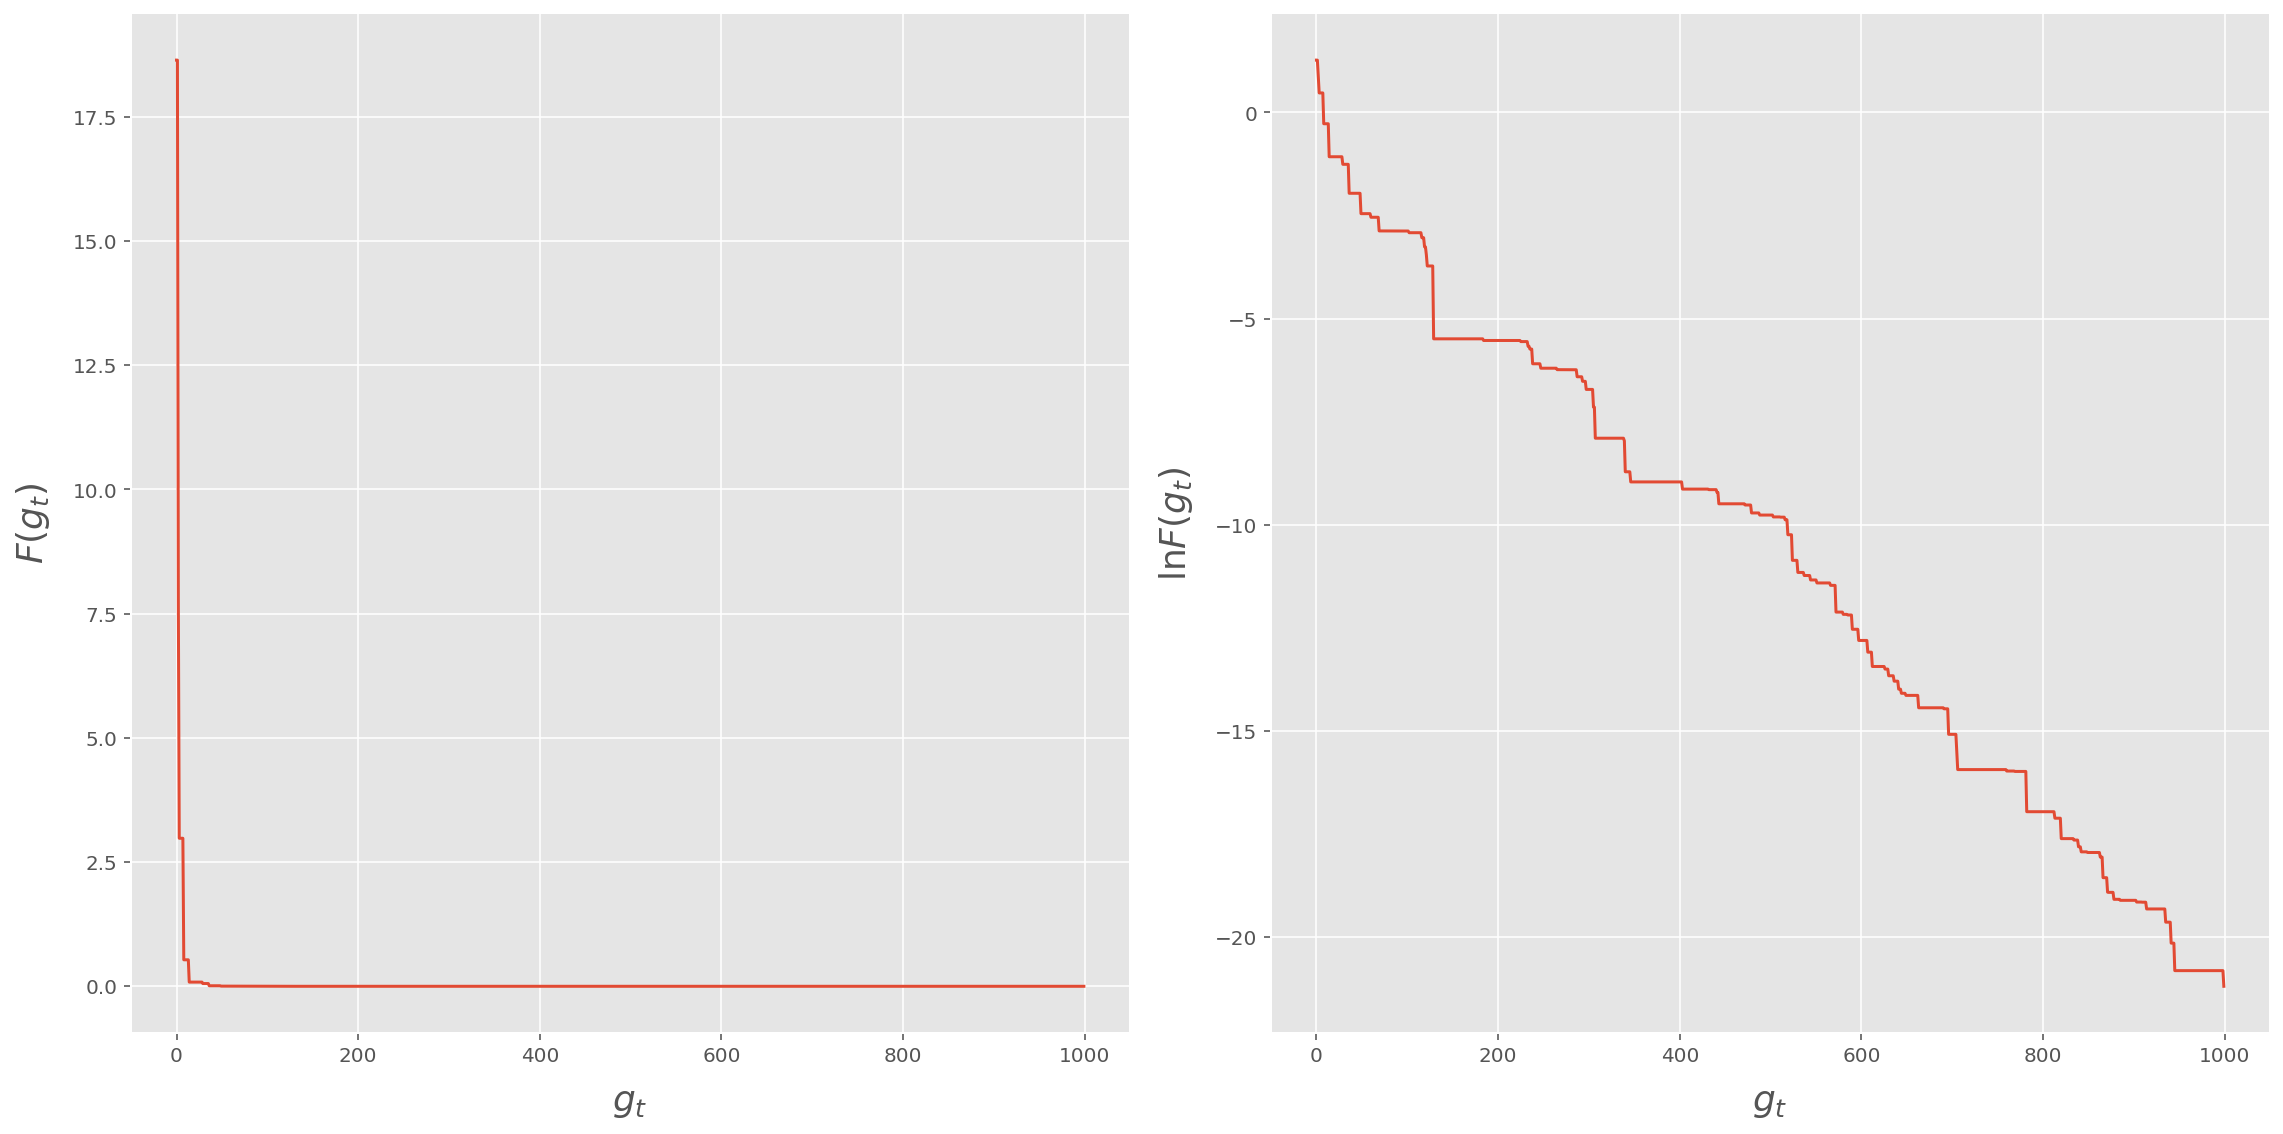

In [30]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("$g_t$", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$F(g_t)$", fontsize=18, labelpad=10)
ax_0.plot(a.func_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("$g_t$", fontsize=18, labelpad=10)  
ax_1.set_ylabel("$\ln F(g_t)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(a.func_history))

fig.tight_layout();

## Функция Экли

In [35]:
def func(x):
    part_1 = 20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2)))
    part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[0])))
    return 20 + np.exp(1) - part_1 - part_2

In [36]:
np.random.seed(52)

a = ParticleSwarmOptimisation(w=0.95, ell=100)
a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [-9.13846534e-06 -1.80676524e-06].
Значение функции в данной точке: 2.635228316139049e-05.
